In [10]:
from gradient_descent import Gradient_Descent
import numpy as np, matplotlib.pyplot as plt, os, pandas as pd
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

In [38]:
def logistic_gradient_f(X, y, weights, newtons_m=False):
    # function will include the hessian for convergence purposes
    n = y.shape[0]
    et = np.exp(-X.dot(weights))
    et = 1 / (1 + et)
    grad = X.T.dot((y - et))
    # the minus sign here represents the
    # fact that we are actually trying to
    # find the maximum, since the derivation
    # used for the betas is by maximum likelihood estimation,
    # so we are actually climbing up the ladder.
    # the minus only works in this context because the gradient descent
    # class is for loss function minimization, so it, by default, subtracts
    # the gradient from the current betas.
    
    if newtons_m:
        X_ = X * ( et / (1 + et) )
        hess_1 = np.linalg.inv(X.T.dot(X_))
        return -hess_1.dot(grad)
    return -grad / n

In [70]:
### let's define X of shape (n, 2) and play around a bit, to see if it's working
np.random.seed(1)
n = 1_000
X = np.concatenate((np.ones((n, 1)), np.random.randn(n).reshape((-1, 1))), axis=1)
y = np.random.binomial(n=1, p=1/2, size=n)
y[np.where(X[:, 1] > 0.5)] = 1
onetozero = np.where( ( X[:, 1] < 0.5 ) & ( (y==1).reshape(-1, ) ) )[0]
y[onetozero] = np.random.binomial(n=1, p=1/2, size=onetozero.size)
X[np.where(y==1), 1] += 3.3
y=y.reshape(-1, 1)

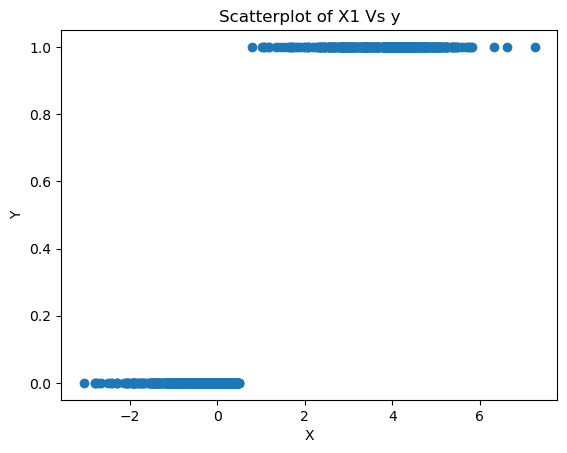

In [71]:
plt.title('Scatterplot of X1 Vs y')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X[:, 1], y)
plt.show()

In [72]:
init_weights = np.zeros((2, 1))
# init_weights = np.array([5., 5.]).reshape(-1, 1)


w = Gradient_Descent(
    weights=init_weights,
    gradient_function=logistic_gradient_f,
    epsilon=1e-4,
)

w.fit(X, y, alpha=8e-1)

Reached convergence after 63801 steps.


array([[-12.13223802],
       [ 16.68274888]])

In [73]:
ypred = X.dot(w.weights) # logits
ypred_probs = 1 / (1 + np.exp(-ypred))

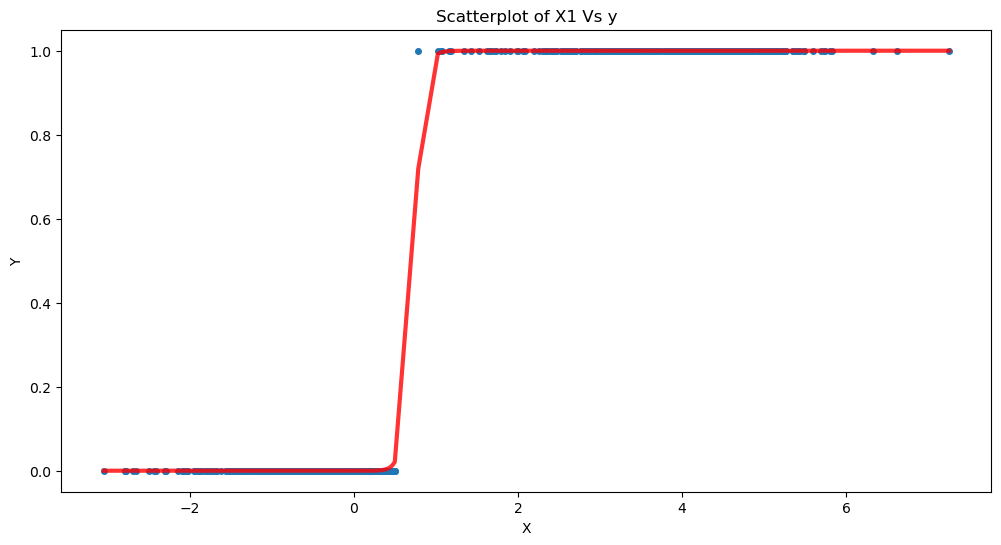

In [75]:
xx, ypr = zip(*sorted(zip(X[:, 1], ypred_probs.reshape(-1,))))
plt.figure(figsize=(12, 6))
plt.title('Scatterplot of X1 Vs y')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X[:, 1], y, s=16)
plt.plot(xx, ypr, alpha=0.8, linewidth=3, c='red', )
plt.show()

In [17]:
fpr, tpr, tholds = roc_curve(y, ypred_probs)

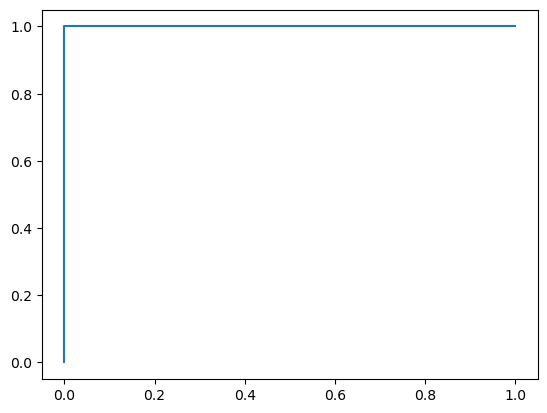

In [18]:
plt.plot(fpr, tpr,)